<a href="https://colab.research.google.com/github/satyaki-sen/Bank_Marketing_Outcome/blob/main/BankProgramClassifier_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sb

In [2]:
tf.__version__

'2.5.0'

##Data Preprocessing.

In [3]:
dataset=pd.read_csv('bank-full.csv',delimiter=';')

In [4]:
dataset.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
print(len(dataset))

45211


In [7]:
dataset.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


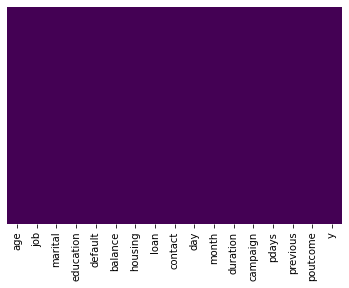

In [8]:
sb.heatmap(dataset.isnull(),cbar=False,yticklabels=False,cmap='viridis')

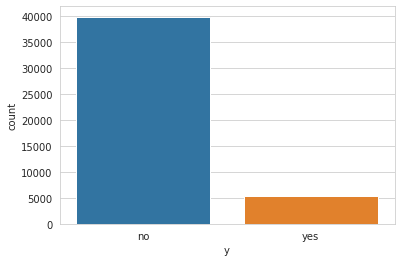

In [9]:
sb.set_style('whitegrid')
sb.countplot(x='y',data=dataset)

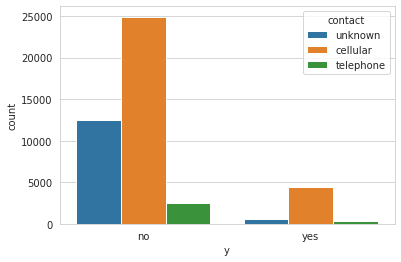

In [10]:
sb.set_style('whitegrid')
sb.countplot(x='y',hue='contact',data=dataset)

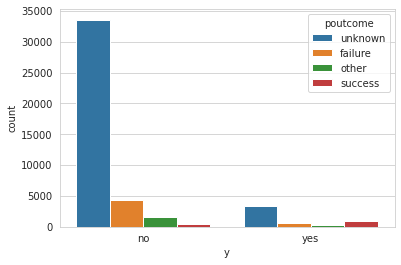

In [11]:
sb.set_style('whitegrid')
sb.countplot(x='y',hue='poutcome',data=dataset)

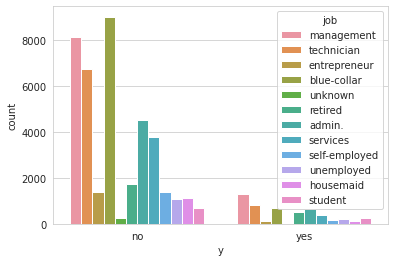

In [12]:
sb.set_style('whitegrid')
sb.countplot(x='y',hue='job',data=dataset)

In [25]:
dataset.drop(labels=['month'],axis=1,inplace=True)

In [26]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [27]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [29]:
print(x)

[[58 'management' 'married' ... -1 0 'unknown']
 [44 'technician' 'single' ... -1 0 'unknown']
 [33 'entrepreneur' 'married' ... -1 0 'unknown']
 ...
 [72 'retired' 'married' ... 184 3 'success']
 [57 'blue-collar' 'married' ... -1 0 'unknown']
 [37 'entrepreneur' 'married' ... 188 11 'other']]


In [30]:
print(y)

['no' 'no' 'no' ... 'yes' 'no' 'no']


In [31]:
dataset.head() #4,6,7

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,198,1,-1,0,unknown,no


In [21]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

##Encoding Categorical Data

In [36]:
from sklearn.preprocessing import LabelEncoder #Encoding the Genders
le=LabelEncoder()
x[:,4]=le.fit_transform(x[:,4])
x[:,6]=le.fit_transform(x[:,6])
x[:,7]=le.fit_transform(x[:,7])
y=le.fit_transform(y)

In [39]:
from sklearn.preprocessing import OneHotEncoder #1,2,3,8,14
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3,8,14])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [40]:
print(x)

[[0.0 0.0 0.0 ... 1 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]
 [0.0 0.0 1.0 ... 1 -1 0]
 ...
 [0.0 0.0 0.0 ... 5 184 3]
 [0.0 1.0 0.0 ... 4 -1 0]
 [0.0 0.0 1.0 ... 2 188 11]]


In [41]:
print(y)

[0 0 0 ... 1 0 0]


##Splitting the dataset into Training and Test Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
print(x_train)

[[1.0 0.0 0.0 ... 1 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]
 [0.0 0.0 0.0 ... 4 96 2]
 ...
 [0.0 0.0 0.0 ... 2 -1 0]
 [0.0 0.0 0.0 ... 2 182 1]
 [0.0 1.0 0.0 ... 4 -1 0]]


In [44]:
print(x_test)

[[0.0 0.0 0.0 ... 15 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]
 [0.0 1.0 0.0 ... 5 -1 0]
 ...
 [0.0 0.0 0.0 ... 3 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]]


In [45]:
print(y_train)

[1 0 0 ... 1 0 0]


In [46]:
print(y_test)

[0 1 0 ... 0 1 0]


In [47]:
print(len(x_train))

36168


In [48]:
print(len(x_test))

9043


##Feature Scaling

In [49]:
#Compulsory for DeepLearning Models.Standarise the training.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##Building the ANN Model

In [50]:
ann=tf.keras.models.Sequential()

In [51]:
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))

In [52]:
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))

In [53]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #output layer is sigmoid cause it gives us probability.

##Training the ANN

In [54]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
1131/1131 [==============================] - 2s 979us/step - loss: 0.3281 - accuracy: 0.8726
Epoch 2/100
1131/1131 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.8976
Epoch 3/100
1131/1131 [==============================] - 1s 991us/step - loss: 0.2354 - accuracy: 0.9006
Epoch 4/100
1131/1131 [==============================] - 1s 976us/step - loss: 0.2329 - accuracy: 0.9014
Epoch 5/100
1131/1131 [==============================] - 1s 951us/step - loss: 0.2315 - accuracy: 0.9020
Epoch 6/100
1131/1131 [==============================] - 1s 966us/step - loss: 0.2307 - accuracy: 0.9024
Epoch 7/100
1131/1131 [==============================] - 1s 979us/step - loss: 0.2297 - accuracy: 0.9020
Epoch 8/100
1131/1131 [==============================] - 1s 963us/step - loss: 0.2290 - accuracy: 0.9019
Epoch 9/100
1131/1131 [==============================] - 1s 973us/step - loss: 0.2284 - accuracy: 0.9030
Epoch 10/100
1131/1131 [==============================] -

##Predicting the Test Set Results

In [60]:
y_pred=ann.predict(x_test)

In [63]:
y_pred=(y_pred>0.5)

In [64]:
print(y_pred)

[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]


In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[7706,  274],
       [ 670,  393]])

In [68]:
accuracy_score(y_test, y_pred)

0.8956098639831914